Attempting a predictive model for determining Click - through rate for advertising dataset.
Reference site: https://thecleverprogrammer.com/2021/01/24/click-through-rate-prediction-with-machine-learning/

In [46]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import datetime
import seaborn as sb
sb.set()

In [2]:
#Load the dataset
adv_df = pd.read_csv('datasets/Advertising.csv')

In [11]:
#Check for NaNs, Describe the dataset & display top rows
adv_df.info()
adv_df.describe(include = 'all')
adv_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [26]:
print(adv_df['Ad Topic Line'].describe())
print('---------------------------------------------')
print(adv_df['Country'].describe())
print('---------------------------------------------')
print(adv_df['City'].describe())
print('---------------------------------------------')
print(adv_df['Timestamp'].describe())


count                                                  1000
unique                                                 1000
top       Synergized well-modulated Graphical User Inter...
freq                                                      1
Name: Ad Topic Line, dtype: object
---------------------------------------------
count       1000
unique       237
top       France
freq           9
Name: Country, dtype: object
---------------------------------------------
count          1000
unique          969
top       Lisamouth
freq              3
Name: City, dtype: object
---------------------------------------------
count                    1000
unique                   1000
top       2016-06-15 11:56:41
freq                        1
Name: Timestamp, dtype: object


We analyze the features to determine which ones can be dropped, since they would be irrelevant & cannot be utilized in the analysis process.
In this case, features with completely unique values are unnecessary ie. Timestamp, Ad Topic Line & City.
The Country feature may also have ambiguity in the dataset, but is kept for experimentations.

In [29]:
adv_df.drop(columns = ['Ad Topic Line', 'City', 'Timestamp'])

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,0
1,80.23,31,68441.85,193.77,1,Nauru,0
2,69.47,26,59785.94,236.50,0,San Marino,0
3,74.15,29,54806.18,245.89,1,Italy,0
4,68.37,35,73889.99,225.58,0,Iceland,0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,Lebanon,1
996,51.30,45,67782.17,134.42,1,Bosnia and Herzegovina,1
997,51.63,51,42415.72,120.37,1,Mongolia,1
998,55.55,19,41920.79,187.95,0,Guatemala,0


The 'Clicked on Ad' feature is the variable to be determined by the model

Text(0.5, 0, 'Area Income')

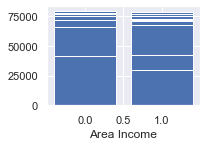

In [49]:
adv_df.groupby('Clicked on Ad').describe()
mp.subplots()

mp.subplot(1,1,1)
mp.bar(adv_df['Clicked on Ad'],'Male')

mp.subplot(2,2,2)
mp.bar(adv_df['Clicked on Ad'],adv_df['Area Income'])
mp.xlabel('Area Income')
# sb.barplot(x = adv_df.Male, y = adv_df['Clicked on Ad'])

<AxesSubplot:xlabel='Male', ylabel='Clicked on Ad'>

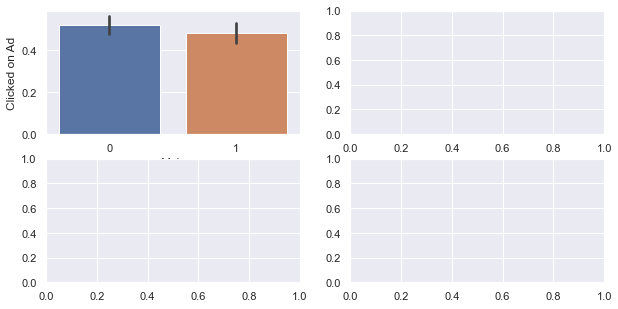

In [68]:
plt, ax = mp.subplots(2,2, figsize = (10,5))

sb.barplot(ax = ax[0,0],x = adv_df.Male, y = adv_df['Clicked on Ad'])

mp.hist(adv_df['Clicked on Ad'],bins=10)



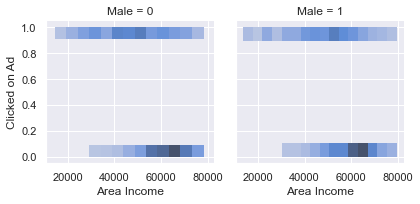

In [56]:
sb.FacetGrid(adv_df, col = 'Male').map(sb.histplot, 'Area Income', 'Clicked on Ad')